# CE811 CNN Lab
Dr Michael Fairbank.  University of Essex.

## Training a CNN vision Classifier

- Objectives: Learn more about CNN networks
- Co-objective: Learn about standard Keras vision benchmarks datasets - MNIST, CIFAR-10, Mnist-Fashion

### Instructions: 

1. Go through each code block,
 study and make sure you understand each of them,
 and fill in the missing "TODO" parts.

2. Save a neural network for the MNIST dataset

3. Save a neural network for the Cifar10 dataset

4. If you have further time, then work though the "checklist of things to do" in the final block of this page.

Before you start
- Check you have the python packages numpy, matplotlib, tensorflow.
- e.g. install them with "pip3 install numpy, matplotlib, tensorflow"

Acknowledgements:
- Thank you for bug fixes and enhancements provided by Rachel Lowe, 2021

## Load a vision benchmark dataset

- We will start with the MNIST hand-written numeric digits dataset.


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np, os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
os.environ["KERAS_BACKEND"] = "tensorflow"


dataset_name="mnist"
if dataset_name=="cifar10":
    dataset = tf.keras.datasets.cifar10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    # CIFAR10 images are 32*32*3.
    accuracy_threshold = 0.6  # progress checker expects >60% accuracy on CIFAR10
elif dataset_name=="fashion":
    dataset = tf.keras.datasets.fashion_mnist
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    accuracy_threshold = 0.8
elif dataset_name=="mnist":
    accuracy_threshold = 0.96  # progress checker expects >96% accuracy on MNIST.
    dataset = tf.keras.datasets.mnist
    class_names = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
else:
    print("unknown dataset")
    raise Exception("Please specify a valid dataset!")
(train_images0, train_labels0),(test_images0, test_labels0) = dataset.load_data()
print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))
train_labels=train_labels0.reshape(-1)
test_labels=test_labels0.reshape(-1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


## Visualise the Dataset

- Show pictures of the images we are trying to learn...

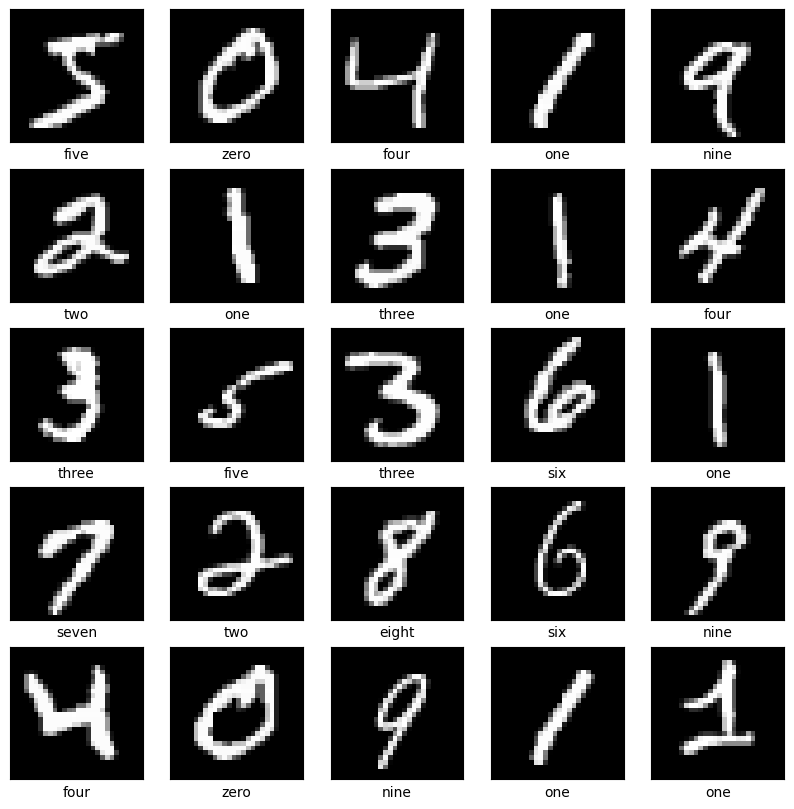

In [3]:
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
plt.show()

## Prep the data
- The keras datasets contain integer pixel intensities from 0 to 255.  We must rescale this to floats from 0 to 1.

In [5]:
# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=(test_images0/255.0).astype(np.float32) # 10000 test patterns, shape 10000*28*28  
train_images=(train_images0/255.0).astype(np.float32) # 60000 train patterns, shape 60000*28*28

if len(train_images.shape)==3:
    # add a single channel to these black-and-white images
    train_images=train_images.reshape(list(train_images.shape)+[1])
    test_images=test_images.reshape(list(test_images.shape)+[1])
    print("Reshaped images from ",train_images0.shape,"to",train_images.shape,"so that 'channel' dimension exists")

num_classification_categories=train_labels.max()+1



Reshaped images from  (60000, 28, 28) to (60000, 28, 28, 1) so that 'channel' dimension exists


## Define a model
- This means build our neural network here.
- TODO modify the simple model defined below
 so that it has the following structure.
- Use relu activation functions everywhere,
 except for the last layer which must have a softmax activation function.
- Use kernel size (3,3) for each convolutional layer
 and pool size (2,2) for each max-pooling layer.
 Ensure you obtain the architecture exactly as shown here...

```
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 3)      │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 147)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,459 (79.92 KB)

 Trainable params: 20,459 (79.92 KB)

 Non-trainable params: 0 (0.00 B)

```


In [16]:
# build FFNN with CNN architecture
keras_model = keras.Sequential()
#TODO
keras_model.add(layers.Conv2D(filters=6,kernel_size=(3, 3),activation='relu',padding='same',input_shape=(28, 28, 1)))
keras_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
keras_model.add(layers.Conv2D(filters=3,kernel_size=(3, 3), activation='relu',padding='same'))
keras_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

keras_model.add(layers.Flatten())
keras_model.add(layers.Dense(128, activation='relu'))
keras_model.add(layers.Dense(num_classification_categories, activation='softmax'))

## View Model Summary

- have a look at the model summary here.
- Try to verify that the number of parameters of each layer
matches what you calculate it should be.

In [7]:
keras_model.build(input_shape=(None,)+train_images.shape[1:])
keras_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 3)      │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 147)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,459 (79.92 KB)

 Trainable params: 20,459 (79.92 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
if keras_model.count_params()>800000:
    print("The lab progress-checker has a 10MB limit on your model size, so please use a smaller model if you want to validate through the auto-marker!")
assert keras_model.layers[-1].name=="dense_1", "Please restart your Jupyter-notebook kernel and re-run the above blocks.  The variable names of the network layers need to match what I hope they will be for the auto-marker.  Don't waste your time training the neural network until you have an exact match for the layer names and dimensions."

## Train the network

In [9]:
optimizer=keras.optimizers.Adam()

keras_model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

history = keras_model.fit(train_images, train_labels,
                batch_size=128,
                epochs=5,
                validation_data=(test_images, test_labels))


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8632 - loss: 0.4801 - val_accuracy: 0.9489 - val_loss: 0.1679
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9575 - loss: 0.1376 - val_accuracy: 0.9689 - val_loss: 0.0941
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9709 - loss: 0.0944 - val_accuracy: 0.9678 - val_loss: 0.0989
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9767 - loss: 0.0748 - val_accuracy: 0.9772 - val_loss: 0.0675
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9807 - loss: 0.0625 - val_accuracy: 0.9775 - val_loss: 0.0685


## Plot graphs of learning progress...

- Have a look at these graphs, and try to work out whether any
 overfitting has occurred, or whether we would gain any benefit
 for training for more or fewer epochs (TODO)

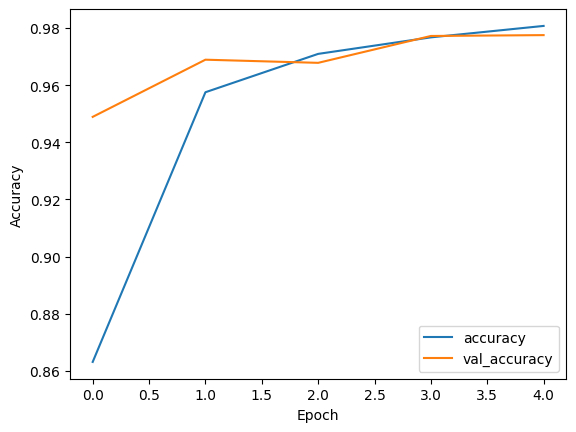

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


## Inspect how well the system is working...
- The test set has a lot of images in it,
 but we can only view 25 at a time.
- Hence rerun this code block several times,
 to get a different random set of samples from the test set (TODO)


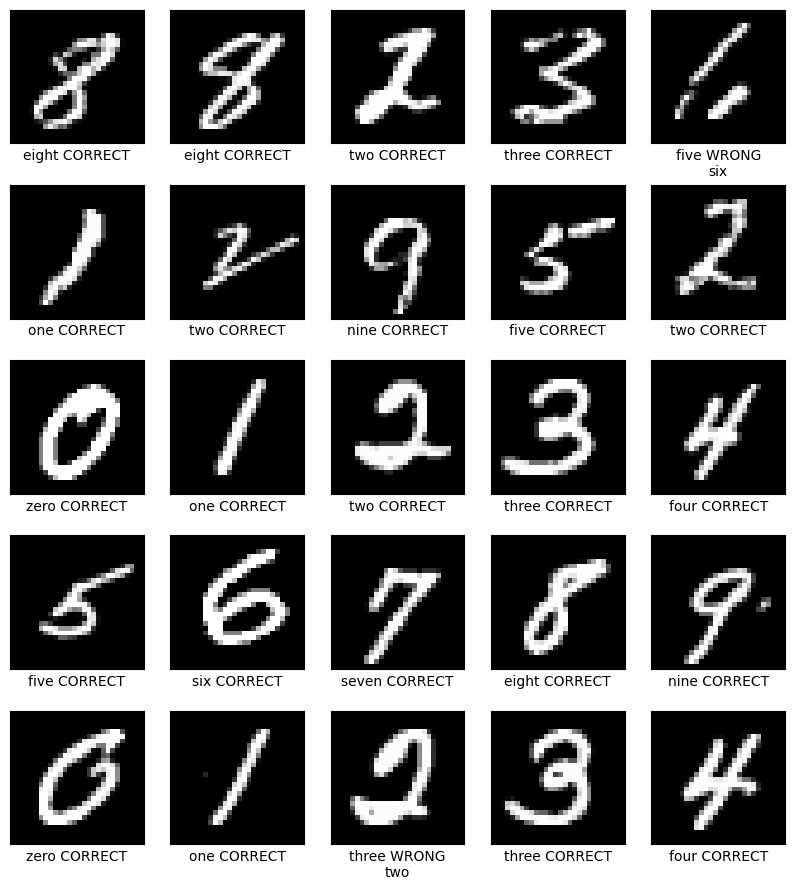

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,11))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        prediction=keras_model(test_images[i:i+1])[0,:]
        prediction_class=np.argmax(prediction)
        true_label=test_labels[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG\n{}".format(class_names[true_label])))
plt.subplots_adjust(hspace=0.2)
plt.show()

## Save the model
- TODO: Once you have the correct layers created (as described above)
 and have trained a model which can score >96% on the
 MNIST digits validation set, save your model with the next code block.
- Then use your saved model as an attachment to pass questions 1+2 of
 the Lab's auto-marker on Moodle.

In [12]:
if history.history["val_accuracy"][-1] > accuracy_threshold:
    print("Your model is accurate enough!")
    # Save the current model into a local folder
    keras_model.save("Model1"+dataset_name+".keras")
else:
    print("Accuracy is below the threshold!")
    raise Exception("Your model isn't accurate enough to pass the progress checker!")

Your model is accurate enough!


## CIFAR10 image set

- Next try and learn the CIFAR10 image set
- Repeat all of the steps above, but change the dataset_name in the
 top code-block to "cifar10"
- We need a bigger network for CIFAR10 than with MNIST.
 Use this architecture:

```
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)
```

- For the dropout layers, use a Dropout rate of 0.2
  - (google how to do Dropout layers in tensorflow)
- Train for at least 5 epochs,
 and you should be able to score >60% on the test set for CIFAR10.
- Note that the above architecture is still pretty small
 (particularly, by only having 64 filters).
 But we need this particular smaller architecture,
 so that the auto-marker can handle it comfortably.

Once you have this working, upload your saved models to the lab's auto-marker on Moodle.

In [1]:
import numpy as np, os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
os.environ["KERAS_BACKEND"] = "tensorflow"


dataset_name="cifar10"
if dataset_name=="cifar10":
    dataset = tf.keras.datasets.cifar10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    # CIFAR10 images are 32*32*3.
    accuracy_threshold = 0.6  # progress checker expects >60% accuracy on CIFAR10
elif dataset_name=="fashion":
    dataset = tf.keras.datasets.fashion_mnist
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    accuracy_threshold = 0.8
elif dataset_name=="mnist":
    accuracy_threshold = 0.96  # progress checker expects >96% accuracy on MNIST.
    dataset = tf.keras.datasets.mnist
    class_names = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
else:
    print("unknown dataset")
    raise Exception("Please specify a valid dataset!")
(train_images0, train_labels0),(test_images0, test_labels0) = dataset.load_data()
print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))
train_labels=train_labels0.reshape(-1)
test_labels=test_labels0.reshape(-1)


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


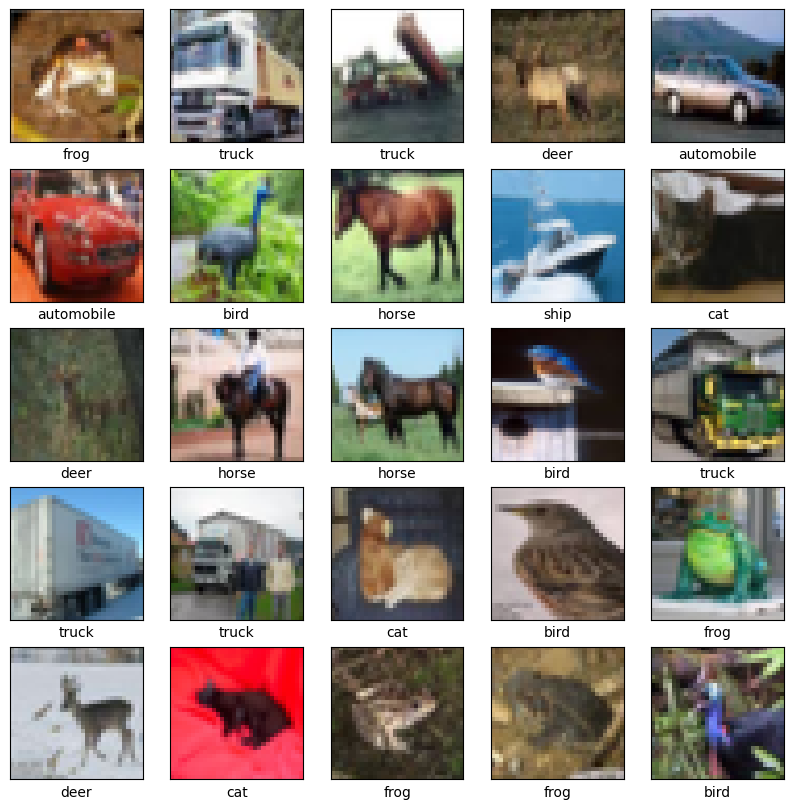

In [2]:
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
plt.show()

In [3]:
# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=(test_images0/255.0).astype(np.float32) # 10000 test patterns, shape 10000*28*28  
train_images=(train_images0/255.0).astype(np.float32) # 60000 train patterns, shape 60000*28*28

if len(train_images.shape)==3:
    # add a single channel to these black-and-white images
    train_images=train_images.reshape(list(train_images.shape)+[1])
    test_images=test_images.reshape(list(test_images.shape)+[1])
    print("Reshaped images from ",train_images0.shape,"to",train_images.shape,"so that 'channel' dimension exists")

num_classification_categories=train_labels.max()+1

In [4]:
# build FFNN with CNN architecture for CIFAR10
keras_model = keras.Sequential()

# 1st conv block
keras_model.add(layers.Conv2D(filters=32,kernel_size=(3, 3),activation='relu',padding='same',input_shape=(32, 32, 3)))
keras_model.add(layers.Conv2D(filters=32,kernel_size=(3, 3),activation='relu',padding='same'))
keras_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
keras_model.add(layers.Dropout(0.2))

# 2nd conv block
keras_model.add(layers.Conv2D(filters=64,kernel_size=(3, 3),activation='relu',padding='same'))
keras_model.add(layers.Conv2D(filters=64,kernel_size=(3, 3),activation='relu',padding='same'))
keras_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
keras_model.add(layers.Dropout(0.2))

# classifier head
keras_model.add(layers.Flatten())
keras_model.add(layers.Dense(128, activation='relu'))
keras_model.add(layers.Dense(num_classification_categories, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
keras_model.build(input_shape=(None,)+train_images.shape[1:])
keras_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
optimizer=keras.optimizers.Adam()

keras_model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

history = keras_model.fit(train_images, train_labels,
                batch_size=128,
                epochs=5,
                validation_data=(test_images, test_labels))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.4437 - loss: 1.5363 - val_accuracy: 0.5774 - val_loss: 1.1765
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.6124 - loss: 1.0952 - val_accuracy: 0.6488 - val_loss: 0.9813
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.6814 - loss: 0.9078 - val_accuracy: 0.6970 - val_loss: 0.8528
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.7230 - loss: 0.7869 - val_accuracy: 0.7283 - val_loss: 0.7825
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.7553 - loss: 0.7011 - val_accuracy: 0.7481 - val_loss: 0.7314


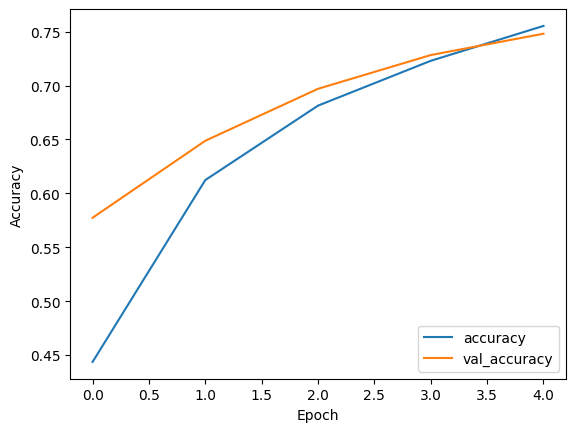

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

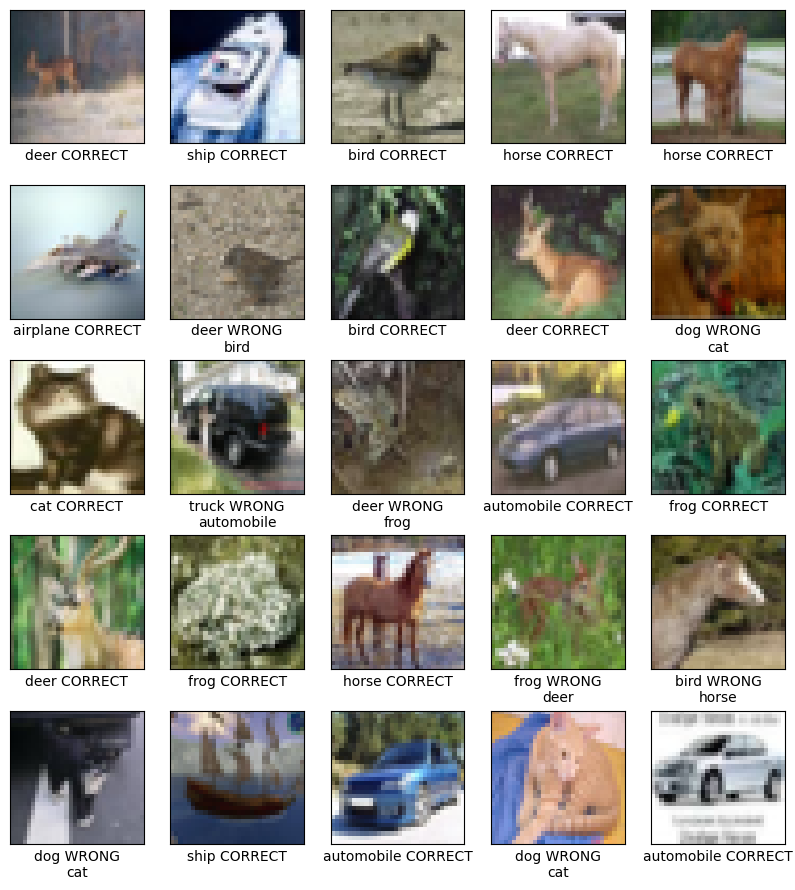

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,11))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        prediction=keras_model(test_images[i:i+1])[0,:]
        prediction_class=np.argmax(prediction)
        true_label=test_labels[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG\n{}".format(class_names[true_label])))
plt.subplots_adjust(hspace=0.2)
plt.show()

In [9]:
if history.history["val_accuracy"][-1] > accuracy_threshold:
    print("Your model is accurate enough!")
    # Save the current model into a local folder
    keras_model.save("Model1"+dataset_name+".keras")
else:
    print("Accuracy is below the threshold!")
    raise Exception("Your model isn't accurate enough to pass the progress checker!")

Your model is accurate enough!


## Checklist of further things to do

Okay you should have completed the progress checker by now.
But if you want to explore further, then...

1. Check you have made 3 different vision classifiers;
    for Mnist, mnist-fashion and for cifar10.
    No need to bother with cifar100. (TODO)

2. Check in each case you have inspected the results,
 the validation accuracy and decided whether more or fewer epochs
 would be required. (TODO)

3. If you have time remaining then see if you can improve performance
 on Cifar10.
    * Possible methods:
        * Try training for longer.
        * Add more convolutional layers.
        * Add more filters at each convolutional layer.
    * If you view the CNN structure used here: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
    (read the final architecture he used at the bottom of the page)
    then you can see how to score >80% on CIFAR10.
    But it requires a lot of CPU/GPU time to get there.
    See the next note on google colab for free GPU usage.

4. Try running your notebook in **google colab**,
 for free extra GPU speed.
 See [video](https://panopto.essex.ac.uk/Panopto/Pages/Viewer.aspx?id=e006900f-1e8c-46c6-85d1-ac8e00f39805) showing how to do that.

5. If time permits,
 then see what the effect of changing the relu activation functions to tanh.

6. If time permits,
 then try removing all of the convolutional layers,
 and just have a fully-connected classifier.
 Remember you still need the flatten layers though
 as these images are each rank3 tensors.
